<a href="https://colab.research.google.com/github/oixhwotl/GoogleColab/blob/master/PytorchExample002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


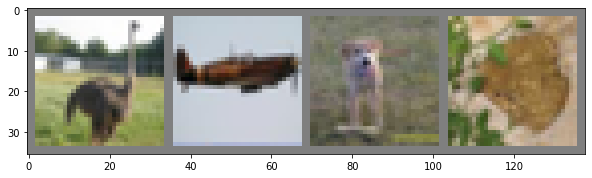

 bird plane   dog  frog


In [3]:
def imshow(img):
  plt.figure(figsize=(10, 10))
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [0]:
class ConvNet(nn.Module):
  def __init__(self, n_channels, n_output_neurons):
    super().__init__()

    self.main = nn.Sequential(
        nn.Conv2d(n_channels, 16, kernel_size=5, stride=2, padding=0),
        nn.ReLU(inplace=True),
        nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=0),
        nn.ReLU(inplace=True),
        nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=0),
        nn.ReLU(inplace=True),
    )

    self.mlp = nn.Sequential(
        nn.Linear(64, 32),
        nn.LeakyReLU(inplace=True),
        nn.Linear(32, n_output_neurons)
    )

  def forward(self, x):
    batch_size = x.shape[0]

    x = self.main(x)
    # x shape [batch_size, 64, 1, 1]

    x = x.view(batch_size, -1)

    return self.mlp(x)

In [8]:
height, width = images.shape[2: ]
images.shape

torch.Size([4, 3, 32, 32])

In [11]:
net = ConvNet(n_channels=3, n_output_neurons=10) #.cuda()
net(images).shape

torch.Size([4, 10])

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [13]:
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    images, labels = data
    #images, labels = images.cuda(), labels.cuda()

    # gradients to zero
    optimizer.zero_grad()

    # forward pass + loss
    output = net(images)
    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
      running_loss = 0.0

print('Finish training')

[1,  2000] loss: 1.917
[1,  4000] loss: 1.622
[1,  6000] loss: 1.546
[1,  8000] loss: 1.504
[1, 10000] loss: 1.462
[1, 12000] loss: 1.419
[2,  2000] loss: 1.366
[2,  4000] loss: 1.338
[2,  6000] loss: 1.316
[2,  8000] loss: 1.321
[2, 10000] loss: 1.283
[2, 12000] loss: 1.301
[3,  2000] loss: 1.220
[3,  4000] loss: 1.219
[3,  6000] loss: 1.196
[3,  8000] loss: 1.221
[3, 10000] loss: 1.221
[3, 12000] loss: 1.218
[4,  2000] loss: 1.129
[4,  4000] loss: 1.156
[4,  6000] loss: 1.137
[4,  8000] loss: 1.143
[4, 10000] loss: 1.136
[4, 12000] loss: 1.134
[5,  2000] loss: 1.076
[5,  4000] loss: 1.078
[5,  6000] loss: 1.078
[5,  8000] loss: 1.078
[5, 10000] loss: 1.093
[5, 12000] loss: 1.087
Finish training


In [15]:
def get_quality(net):
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      #images, labels = images.cuda(), labels.cuda()
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print("Accuracy of the network on test images: %d %%" % (100 * correct / total))

get_quality(net)

Accuracy of the network on test images: 58 %
